In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

source_dir = "/content/drive/MyDrive/облепиха/деревья_jpg"
target_dir = "/content/yolo_tree_dataset"

# Создаем структуру папок
for sub in ['images/train', 'images/val', 'labels/train', 'labels/val']:
    os.makedirs(os.path.join(target_dir, sub), exist_ok=True)


In [ ]:
import shutil
import random

# Список всех .jpg файлов
files = [f for f in os.listdir(source_dir) if f.endswith('.jpg')]
random.shuffle(files)
split = int(len(files) * 0.8)
train, val = files[:split], files[split:]

def copy_files(file_list, subset):
    for file in file_list:
        name = file.split('.')[0]
        jpg_src = os.path.join(source_dir, file)
        txt_src = os.path.join(source_dir, name + '.txt')
        shutil.copy(jpg_src, os.path.join(target_dir, f'images/{subset}', file))
        shutil.copy(txt_src, os.path.join(target_dir, f'labels/{subset}', name + '.txt'))

copy_files(train, 'train')
copy_files(val, 'val')

print(f"✅ Копирование завершено: {len(train)} train / {len(val)} val")


✅ Копирование завершено: 160 train / 40 val


In [ ]:
yaml_path = "/content/tree_data.yaml"

with open(yaml_path, "w") as f:
    f.write(
        "path: /content/yolo_tree_dataset\n"
        "train: images/train\n"
        "val: images/val\n"
        "names:\n"
        "  0: sea_buckthorn_tree\n"
    )

print("✅ YAML готов")


✅ YAML готов


In [ ]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
bad_train_files = []

train_dir = "/content/yolo_tree_dataset/labels/train"

for fname in os.listdir(train_dir):
    if fname.endswith(".txt"):
        with open(os.path.join(train_dir, fname), 'r') as f:
            lines = f.readlines()
            for line in lines:
                if not line.strip():
                    continue
                class_id = int(line.split()[0])
                if class_id > 0:
                    bad_train_files.append(fname)
                    break

print(f"❗️ В train остались файлы с неверной меткой: {len(bad_train_files)}")
print("Примеры:", bad_train_files[:5])


❗️ В train остались файлы с неверной меткой: 160
Примеры: ['tree_027.txt', 'tree_028.txt', 'tree_038.txt', 'tree_093.txt', 'tree_194.txt']


In [ ]:
fixed = 0
for fname in bad_train_files:
    path = f"/content/yolo_tree_dataset/labels/train/{fname}"
    with open(path, "r") as f:
        lines = f.readlines()

    new_lines = []
    for line in lines:
        if not line.strip():
            continue
        parts = line.strip().split()
        parts[0] = "0"  # Принудительно заменяем класс на 0
        new_lines.append(" ".join(parts))

    with open(path, "w") as f:
        f.write("\n".join(new_lines) + "\n")
    fixed += 1

print(f"✅ Переписано: {fixed} файлов")


✅ Переписано: 160 файлов


In [ ]:
bad_val_files = []

val_dir = "/content/yolo_tree_dataset/labels/val"

for fname in os.listdir(val_dir):
    if fname.endswith(".txt"):
        with open(os.path.join(val_dir, fname), 'r') as f:
            lines = f.readlines()
            for line in lines:
                if not line.strip():
                    continue
                class_id = int(line.split()[0])
                if class_id > 0:
                    bad_val_files.append(fname)
                    break

print(f"❗️ Валидационных файлов с ошибками: {len(bad_val_files)}")
print("Примеры:", bad_val_files[:5])


❗️ Валидационных файлов с ошибками: 40
Примеры: ['tree_102.txt', 'tree_024.txt', 'tree_166.txt', 'tree_172.txt', 'tree_135.txt']


In [ ]:
fixed = 0
for fname in bad_val_files:
    path = f"/content/yolo_tree_dataset/labels/val/{fname}"
    with open(path, "r") as f:
        lines = f.readlines()

    new_lines = []
    for line in lines:
        if not line.strip():
            continue
        parts = line.strip().split()
        parts[0] = "0"
        new_lines.append(" ".join(parts))

    with open(path, "w") as f:
        f.write("\n".join(new_lines) + "\n")
    fixed += 1

print(f"✅ Исправлено в val: {fixed} файлов")


✅ Исправлено в val: 40 файлов


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # или yolov8s.pt если хочешь посильнее


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 270MB/s]


In [ ]:
model.train(data=yaml_path, epochs=50, imgsz=640)


Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tree_data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

train: Scanning /content/yolo_tree_dataset/labels/train.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1587.9±274.5 MB/s, size: 664.1 KB)



val: Scanning /content/yolo_tree_dataset/labels/val... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 2366.15it/s]

val: New cache created: /content/yolo_tree_dataset/labels/val.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.8196      2.327      1.417         71        640: 100%|██████████| 10/10 [02:34<00:00, 15.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.38s/it]

                   all         40         55    0.00458          1      0.529      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.6368      1.464      1.323         69        640: 100%|██████████| 10/10 [02:22<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.63s/it]

                   all         40         55     0.0118      0.891      0.504       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.6183      1.149      1.266         65        640: 100%|██████████| 10/10 [02:20<00:00, 14.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.78s/it]

                   all         40         55      0.323      0.436      0.336      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      0.591       1.08       1.24         53        640: 100%|██████████| 10/10 [02:20<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.62s/it]

                   all         40         55      0.889      0.691      0.729      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.6023      1.019      1.209         49        640: 100%|██████████| 10/10 [02:23<00:00, 14.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]

                   all         40         55      0.697      0.671      0.648      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.5893       1.01      1.209         44        640: 100%|██████████| 10/10 [02:21<00:00, 14.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.58s/it]

                   all         40         55      0.569      0.545      0.516      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      0.647     0.9713      1.215         52        640: 100%|██████████| 10/10 [02:20<00:00, 14.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.57s/it]

                   all         40         55      0.462      0.594       0.41      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.6288     0.9677      1.224         61        640: 100%|██████████| 10/10 [02:20<00:00, 14.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.03s/it]

                   all         40         55      0.489      0.491      0.457      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.6525     0.9334      1.238         55        640: 100%|██████████| 10/10 [02:21<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.87s/it]

                   all         40         55      0.576      0.527      0.513      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.6277     0.8892      1.205         66        640: 100%|██████████| 10/10 [02:18<00:00, 13.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.01s/it]

                   all         40         55      0.741      0.345      0.397      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.5707     0.8466      1.197         64        640: 100%|██████████| 10/10 [02:19<00:00, 13.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.70s/it]

                   all         40         55      0.872      0.618      0.764       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G        0.6     0.8401      1.212         63        640: 100%|██████████| 10/10 [02:23<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]

                   all         40         55      0.861      0.618      0.688      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      0.587     0.8082      1.194         51        640: 100%|██████████| 10/10 [02:20<00:00, 14.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.93s/it]

                   all         40         55       0.96      0.564       0.72      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.5948     0.7737      1.182         55        640: 100%|██████████| 10/10 [02:19<00:00, 13.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.67s/it]

                   all         40         55      0.856      0.649      0.723      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.6076     0.7997      1.216         52        640: 100%|██████████| 10/10 [02:20<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]

                   all         40         55      0.971      0.673      0.764      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.5329     0.7135      1.162         53        640: 100%|██████████| 10/10 [02:19<00:00, 13.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]

                   all         40         55      0.906      0.701      0.789      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.5415     0.6942       1.15         59        640: 100%|██████████| 10/10 [02:19<00:00, 13.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.06s/it]

                   all         40         55      0.917      0.602      0.757      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.6085     0.7487      1.213         67        640: 100%|██████████| 10/10 [02:18<00:00, 13.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.70s/it]

                   all         40         55      0.912      0.618      0.725      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.5287     0.6995      1.141         57        640: 100%|██████████| 10/10 [02:19<00:00, 13.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.76s/it]

                   all         40         55      0.874      0.764      0.838      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.5273     0.6887      1.158         55        640: 100%|██████████| 10/10 [02:22<00:00, 14.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.93s/it]

                   all         40         55      0.998      0.782      0.835      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.4842     0.6639      1.128         55        640: 100%|██████████| 10/10 [02:24<00:00, 14.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.70s/it]

                   all         40         55      0.766      0.764      0.789      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.5035     0.6653      1.116         52        640: 100%|██████████| 10/10 [02:16<00:00, 13.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.70s/it]

                   all         40         55      0.617      0.727      0.719      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.4657     0.6063      1.093         60        640: 100%|██████████| 10/10 [02:16<00:00, 13.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.49s/it]

                   all         40         55       0.76      0.764      0.757      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.4471     0.5958      1.104         44        640: 100%|██████████| 10/10 [02:17<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.64s/it]

                   all         40         55      0.801      0.764      0.823      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.4462     0.5736      1.083         61        640: 100%|██████████| 10/10 [02:18<00:00, 13.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.64s/it]

                   all         40         55      0.943      0.745      0.852      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      0.504      0.645      1.132         55        640: 100%|██████████| 10/10 [02:18<00:00, 13.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.56s/it]

                   all         40         55       0.79      0.745        0.8      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.4253     0.5593       1.07         57        640: 100%|██████████| 10/10 [02:19<00:00, 13.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.44s/it]

                   all         40         55      0.835      0.764      0.843      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.4301     0.5992      1.056         57        640: 100%|██████████| 10/10 [02:20<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.58s/it]

                   all         40         55      0.938      0.709      0.852      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.4916     0.5858      1.115         69        640: 100%|██████████| 10/10 [02:21<00:00, 14.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.83s/it]

                   all         40         55      0.916      0.793      0.863      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.4156     0.5307      1.074         58        640: 100%|██████████| 10/10 [02:20<00:00, 14.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]

                   all         40         55      0.997      0.782      0.848      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.3938       0.51      1.049         60        640: 100%|██████████| 10/10 [02:18<00:00, 13.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.75s/it]

                   all         40         55      0.998      0.782      0.847      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.4114     0.5367      1.086         52        640: 100%|██████████| 10/10 [02:18<00:00, 13.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]

                   all         40         55          1      0.671      0.822      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.3936     0.5126      1.054         70        640: 100%|██████████| 10/10 [02:18<00:00, 13.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]

                   all         40         55      0.683      0.785       0.81       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.4707     0.5839      1.086         54        640: 100%|██████████| 10/10 [02:20<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.66s/it]

                   all         40         55      0.862       0.68      0.798      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      0.385      0.492      1.037         50        640: 100%|██████████| 10/10 [02:20<00:00, 14.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.78s/it]

                   all         40         55      0.805      0.727      0.795      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.3783     0.4951      1.041         67        640: 100%|██████████| 10/10 [02:22<00:00, 14.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.74s/it]

                   all         40         55      0.976      0.782      0.844      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.4018     0.5214      1.066         50        640: 100%|██████████| 10/10 [02:16<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.58s/it]

                   all         40         55      0.977      0.763      0.866       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.3491     0.4693      1.043         55        640: 100%|██████████| 10/10 [02:15<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.43s/it]

                   all         40         55      0.971      0.818      0.885      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.3513      0.459      1.029         59        640: 100%|██████████| 10/10 [02:16<00:00, 13.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]

                   all         40         55      0.956      0.836      0.879      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.3689     0.4684      1.028         61        640: 100%|██████████| 10/10 [02:21<00:00, 14.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.59s/it]

                   all         40         55      0.979      0.834      0.898      0.752


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.4305     0.8351      1.136         22        640: 100%|██████████| 10/10 [02:19<00:00, 13.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.45s/it]

                   all         40         55      0.996      0.818      0.913      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.3866     0.6035      1.064         19        640: 100%|██████████| 10/10 [02:20<00:00, 14.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]

                   all         40         55      0.978      0.805      0.908      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.3632     0.6219      1.047         23        640: 100%|██████████| 10/10 [02:19<00:00, 13.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.70s/it]

                   all         40         55      0.948      0.818      0.906       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.3355     0.5454      1.034         20        640: 100%|██████████| 10/10 [02:20<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]

                   all         40         55      0.994      0.818       0.92      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.3339     0.5242      1.041         20        640: 100%|██████████| 10/10 [02:22<00:00, 14.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.54s/it]

                   all         40         55      0.994      0.818      0.914      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.3267     0.4757      1.018         19        640: 100%|██████████| 10/10 [02:21<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]

                   all         40         55          1      0.799      0.904      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.2984     0.4724     0.9884         21        640: 100%|██████████| 10/10 [02:19<00:00, 13.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]

                   all         40         55      0.998        0.8      0.914      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.3103     0.4808      1.006         22        640: 100%|██████████| 10/10 [02:16<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]

                   all         40         55          1      0.813      0.924      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G       0.31     0.4626     0.9985         21        640: 100%|██████████| 10/10 [02:13<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.57s/it]

                   all         40         55          1      0.815      0.924      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.2988     0.4287     0.9565         21        640: 100%|██████████| 10/10 [02:18<00:00, 13.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.44s/it]

                   all         40         55      0.994      0.818      0.925      0.752



50 epochs completed in 2.134 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.99s/it]


                   all         40         55      0.994      0.818       0.92      0.767
Speed: 4.7ms preprocess, 273.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e099aa4a250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!find /content -name best.pt


/content/runs/detect/train3/weights/best.pt


In [ ]:
!cp /content/runs/detect/train3/weights/best.pt /content/drive/MyDrive/облепиха_best.pt


In [ ]:
import os
import random
import shutil

# Путь к папке с ягодами и метками
source_images = "/content/drive/MyDrive/облепиха/ягоды_3"
target_dataset = "/content/yolo_berry_dataset"

# Создание нужной структуры
for sub in ['images/train', 'images/val', 'labels/train', 'labels/val']:
    os.makedirs(os.path.join(target_dataset, sub), exist_ok=True)

# Получаем все изображения
image_files = [f for f in os.listdir(source_images) if f.endswith('.jpg') or f.endswith('.png')]
random.shuffle(image_files)

# Делим 80% train / 20% val
split_index = int(len(image_files) * 0.8)
train_images = image_files[:split_index]
val_images = image_files[split_index:]

def copy_with_labels(images, split):
    for img_file in images:
        base_name = os.path.splitext(img_file)[0]
        img_path = os.path.join(source_images, img_file)
        label_path = os.path.join(source_images, base_name + ".txt")

        shutil.copy(img_path, os.path.join(target_dataset, f"images/{split}", img_file))

        if os.path.exists(label_path):
            shutil.copy(label_path, os.path.join(target_dataset, f"labels/{split}", base_name + ".txt"))

copy_with_labels(train_images, "train")
copy_with_labels(val_images, "val")


In [ ]:
yaml_path = "/content/yolo_berry_dataset/data.yaml"

with open(yaml_path, 'w') as f:
    f.write(
        f"path: {target_dataset}\n"
        f"train: images/train\n"
        f"val: images/val\n"
        f"nc: 1\n"
        f"names: ['berry']\n"
    )


In [ ]:
import os

def check_labels_and_clean(label_dir):
    bad_files = []
    for file in os.listdir(label_dir):
        if not file.endswith(".txt"):
            continue
        path = os.path.join(label_dir, file)
        with open(path, 'r') as f:
            lines = f.readlines()
        if not lines:
            bad_files.append(path)
            os.remove(path)
            continue
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                bad_files.append(path)
                os.remove(path)
                break
            try:
                floats = [float(p) for p in parts]
                if not all(0 <= val <= 1 for val in floats[1:]):
                    bad_files.append(path)
                    os.remove(path)
                    break
            except:
                bad_files.append(path)
                os.remove(path)
                break
    return bad_files

bad_train = check_labels_and_clean("/content/yolo_berry_dataset/labels/train")
bad_val = check_labels_and_clean("/content/yolo_berry_dataset/labels/val")
print(f"Удалено неправильных файлов: {len(bad_train) + len(bad_val)}")


Удалено неправильных файлов: 0


In [ ]:
def find_wrong_class_labels(label_dir, max_class_id=0):
    wrong_files = []
    for file in os.listdir(label_dir):
        if file.endswith(".txt"):
            path = os.path.join(label_dir, file)
            with open(path, 'r') as f:
                lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if not parts: continue
                class_id = int(parts[0])
                if class_id > max_class_id:
                    wrong_files.append((file, class_id))
                    break
    return wrong_files

bad_train = find_wrong_class_labels("/content/yolo_berry_dataset/labels/train")
bad_val = find_wrong_class_labels("/content/yolo_berry_dataset/labels/val")
print("Ошибки в train:", bad_train)
print("Ошибки в val:", bad_val)


Ошибки в train: [('облепиха_053.txt', 16), ('облепиха_021.txt', 16), ('облепиха_043.txt', 16), ('облепиха_008.txt', 16), ('облепиха_078.txt', 16), ('облепиха_015.txt', 16), ('облепиха_080.txt', 16), ('облепиха_063.txt', 16), ('облепиха_070.txt', 16), ('облепиха_038.txt', 16), ('облепиха_057.txt', 16), ('облепиха_060.txt', 16), ('облепиха_048.txt', 16), ('облепиха_042.txt', 16), ('облепиха_082.txt', 16), ('облепиха_034.txt', 16), ('облепиха_027.txt', 16), ('облепиха_003.txt', 16), ('облепиха_076.txt', 16), ('облепиха_025.txt', 16), ('облепиха_090.txt', 16), ('облепиха_032.txt', 16), ('облепиха_037.txt', 16), ('облепиха_011.txt', 16), ('облепиха_075.txt', 16), ('облепиха_068.txt', 16), ('облепиха_041.txt', 16), ('облепиха_022.txt', 16), ('облепиха_085.txt', 16), ('облепиха_023.txt', 16), ('облепиха_089.txt', 16), ('облепиха_005.txt', 16), ('облепиха_033.txt', 16), ('облепиха_018.txt', 16), ('облепиха_047.txt', 16), ('облепиха_079.txt', 16), ('облепиха_012.txt', 16), ('облепиха_083.txt', 

In [ ]:
def fix_class_labels(label_dir, target_class=0):
    for file in os.listdir(label_dir):
        if file.endswith(".txt"):
            path = os.path.join(label_dir, file)
            with open(path, 'r') as f:
                lines = f.readlines()
            fixed_lines = []
            for line in lines:
                parts = line.strip().split()
                if not parts:
                    continue
                class_id = int(parts[0])
                if class_id != target_class:
                    parts[0] = str(target_class)
                fixed_lines.append(" ".join(parts))
            with open(path, 'w') as f:
                f.write("\n".join(fixed_lines))

# Исправляем train и val
fix_class_labels("/content/yolo_berry_dataset/labels/train", target_class=0)
fix_class_labels("/content/yolo_berry_dataset/labels/val", target_class=0)

print("✅ Все неверные классы заменены на 0.")


✅ Все неверные классы заменены на 0.


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # или "yolov8s.pt" для более мощной модели
model.train(data=yaml_path, epochs=50, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 79.9MB/s]


Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_berry_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/yolo_berry_dataset/labels/train... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<00:00, 180.96it/s]

train: New cache created: /content/yolo_berry_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1661.3±820.4 MB/s, size: 792.2 KB)


val: Scanning /content/yolo_berry_dataset/labels/val... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 2916.99it/s]

val: New cache created: /content/yolo_berry_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.394      3.345      1.367        503        640: 100%|██████████| 5/5 [01:25<00:00, 17.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.85s/it]

                   all         18        365     0.0552      0.816      0.114     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.217      2.866      1.205        371        640: 100%|██████████| 5/5 [01:18<00:00, 15.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.11s/it]

                   all         18        365     0.0622      0.921      0.207      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.252      1.833      1.139        230        640: 100%|██████████| 5/5 [01:12<00:00, 14.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.20s/it]

                   all         18        365      0.958      0.186      0.565      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.291      1.203      1.166        265        640: 100%|██████████| 5/5 [01:09<00:00, 13.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.14s/it]

                   all         18        365      0.892      0.422      0.749      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.227      1.037       1.11        289        640: 100%|██████████| 5/5 [01:10<00:00, 14.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.88s/it]

                   all         18        365      0.947       0.54      0.762      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.199      1.001      1.111        289        640: 100%|██████████| 5/5 [01:11<00:00, 14.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.12s/it]

                   all         18        365      0.915       0.53      0.718       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.165     0.9091      1.094        397        640: 100%|██████████| 5/5 [01:12<00:00, 14.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.77s/it]

                   all         18        365      0.838      0.559      0.687      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.241      0.939      1.134        336        640: 100%|██████████| 5/5 [01:10<00:00, 14.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.67s/it]

                   all         18        365      0.825        0.6      0.717      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.143     0.8662      1.102        306        640: 100%|██████████| 5/5 [01:09<00:00, 14.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.92s/it]

                   all         18        365      0.901      0.722      0.808      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.088     0.8553      1.082        284        640: 100%|██████████| 5/5 [01:14<00:00, 14.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.86s/it]

                   all         18        365      0.901      0.777      0.871      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.217     0.9168      1.086        228        640: 100%|██████████| 5/5 [01:14<00:00, 14.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.93s/it]

                   all         18        365      0.905      0.834       0.92      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.117     0.8298      1.055        462        640: 100%|██████████| 5/5 [01:09<00:00, 13.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.14s/it]

                   all         18        365      0.933      0.849      0.928       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G       1.11     0.8393      1.048        448        640: 100%|██████████| 5/5 [01:12<00:00, 14.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]

                   all         18        365      0.876      0.867      0.923      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.131     0.8448      1.049        286        640: 100%|██████████| 5/5 [01:11<00:00, 14.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.75s/it]

                   all         18        365      0.892      0.852      0.902      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.128     0.8383      1.067        262        640: 100%|██████████| 5/5 [01:09<00:00, 13.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.98s/it]

                   all         18        365      0.933      0.836      0.907      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.124     0.8219       1.07        314        640: 100%|██████████| 5/5 [01:12<00:00, 14.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.11s/it]

                   all         18        365       0.84      0.825      0.893      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.108      0.784       1.08        359        640: 100%|██████████| 5/5 [01:10<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.08s/it]

                   all         18        365      0.882      0.858      0.914      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.084     0.7884       1.06        269        640: 100%|██████████| 5/5 [01:14<00:00, 14.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]

                   all         18        365      0.878      0.847      0.909      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.115     0.8072      1.062        395        640: 100%|██████████| 5/5 [01:11<00:00, 14.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.59s/it]

                   all         18        365      0.876      0.849      0.908      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.104     0.8232      1.071        472        640: 100%|██████████| 5/5 [01:09<00:00, 13.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.18s/it]

                   all         18        365      0.918      0.858       0.92      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.104     0.7886      1.043        441        640: 100%|██████████| 5/5 [01:09<00:00, 13.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.64s/it]

                   all         18        365      0.898      0.863      0.914      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.061     0.7624      1.047        291        640: 100%|██████████| 5/5 [01:08<00:00, 13.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.87s/it]

                   all         18        365      0.898      0.868      0.923      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.087     0.7699      1.046        249        640: 100%|██████████| 5/5 [01:11<00:00, 14.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.51s/it]

                   all         18        365      0.901      0.827      0.903      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.064     0.7558      1.048        439        640: 100%|██████████| 5/5 [01:08<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.88s/it]

                   all         18        365      0.892      0.883      0.919       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G       1.07     0.7383      1.039        434        640: 100%|██████████| 5/5 [01:09<00:00, 13.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.80s/it]

                   all         18        365      0.932      0.874      0.927      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.036     0.7271      1.032        407        640: 100%|██████████| 5/5 [01:09<00:00, 13.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.86s/it]

                   all         18        365      0.941      0.877      0.929      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.067     0.7171      1.034        230        640: 100%|██████████| 5/5 [01:12<00:00, 14.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.21s/it]

                   all         18        365      0.916      0.896      0.927      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.076     0.7162      1.022        345        640: 100%|██████████| 5/5 [01:11<00:00, 14.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.26s/it]

                   all         18        365       0.93      0.871      0.925      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.028     0.7019      1.007        227        640: 100%|██████████| 5/5 [01:12<00:00, 14.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]

                   all         18        365      0.926      0.868      0.928      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.039     0.7264      1.024        301        640: 100%|██████████| 5/5 [01:10<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.70s/it]

                   all         18        365      0.917      0.882      0.934      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.9883     0.6788      1.007        365        640: 100%|██████████| 5/5 [01:10<00:00, 14.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.49s/it]

                   all         18        365       0.92      0.881      0.937      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      0.991     0.7072      1.005        446        640: 100%|██████████| 5/5 [01:12<00:00, 14.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.87s/it]

                   all         18        365      0.939      0.885      0.944      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.013     0.6801      1.015        308        640: 100%|██████████| 5/5 [01:09<00:00, 13.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.18s/it]

                   all         18        365      0.945      0.898      0.946        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.9655     0.6575     0.9899        370        640: 100%|██████████| 5/5 [01:10<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.90s/it]

                   all         18        365      0.946      0.893      0.951      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.9757     0.6608      1.009        348        640: 100%|██████████| 5/5 [01:12<00:00, 14.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.91s/it]

                   all         18        365       0.93      0.904      0.954      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.9768     0.6688      1.006        369        640: 100%|██████████| 5/5 [01:11<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.62s/it]

                   all         18        365      0.936      0.907      0.949      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.9549     0.6463      1.006        220        640: 100%|██████████| 5/5 [01:12<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.09s/it]

                   all         18        365      0.943       0.91      0.953      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9492      0.635     0.9928        325        640: 100%|██████████| 5/5 [01:10<00:00, 14.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.26s/it]

                   all         18        365      0.952       0.91      0.951      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.9229     0.6236      0.985        423        640: 100%|██████████| 5/5 [01:13<00:00, 14.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.09s/it]

                   all         18        365      0.949       0.91      0.956      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      0.938     0.6225          1        420        640: 100%|██████████| 5/5 [01:10<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.00s/it]

                   all         18        365      0.947      0.904      0.952      0.703


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9727     0.7962      1.015        160        640: 100%|██████████| 5/5 [01:07<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.63s/it]

                   all         18        365      0.948      0.901      0.954      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9578     0.7593     0.9815        154        640: 100%|██████████| 5/5 [01:07<00:00, 13.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.03s/it]

                   all         18        365      0.942      0.897       0.95      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9611     0.7266     0.9924        172        640: 100%|██████████| 5/5 [01:08<00:00, 13.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.86s/it]

                   all         18        365      0.967      0.881      0.944      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9155     0.6887     0.9711        185        640: 100%|██████████| 5/5 [01:14<00:00, 14.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.41s/it]

                   all         18        365      0.933      0.885      0.939      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9208     0.6908     0.9818        210        640: 100%|██████████| 5/5 [01:11<00:00, 14.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.32s/it]

                   all         18        365      0.927      0.904      0.943      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9351     0.6919     0.9791        138        640: 100%|██████████| 5/5 [01:08<00:00, 13.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.30s/it]

                   all         18        365      0.937      0.902      0.947        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9052     0.6559     0.9655        164        640: 100%|██████████| 5/5 [01:08<00:00, 13.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.67s/it]

                   all         18        365       0.93      0.907       0.95      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9028     0.6557     0.9635        136        640: 100%|██████████| 5/5 [01:06<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.35s/it]

                   all         18        365       0.94      0.909      0.953      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.8893     0.6383     0.9665        167        640: 100%|██████████| 5/5 [01:08<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.07s/it]

                   all         18        365      0.941      0.912      0.955       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      0.938     0.6661     0.9745        247        640: 100%|██████████| 5/5 [01:08<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.81s/it]

                   all         18        365      0.941      0.915      0.956       0.71



50 epochs completed in 1.085 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.85s/it]


                   all         18        365      0.949       0.91      0.956      0.714
Speed: 2.6ms preprocess, 233.2ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aec1b490610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!find /content -name best.pt


/content/runs/detect/train/weights/best.pt


In [ ]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/облепиха_ягоды_best.pt



0: 640x512 1 sea_buckthorn_tree, 201.4ms
Speed: 6.0ms preprocess, 201.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 8 berrys, 197.9ms
Speed: 5.8ms preprocess, 197.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


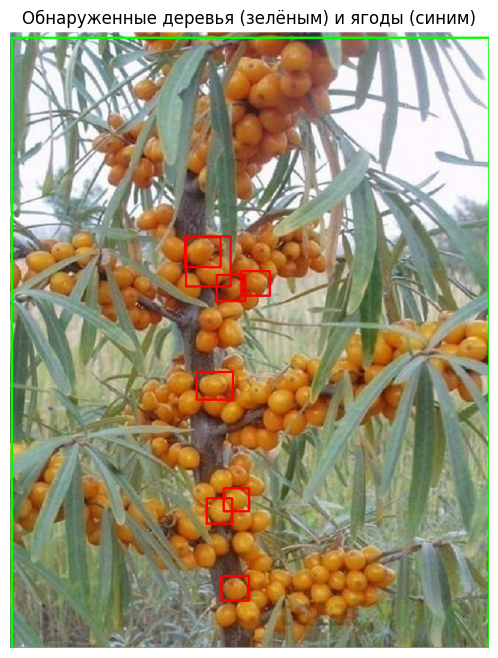

In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загружаем модели
model_tree = YOLO("/content/drive/MyDrive/облепиха_best.pt")
model_berry = YOLO("/content/drive/MyDrive/облепиха_ягоды_best.pt")

# Загружаем изображение
img_path = "/content/tree_019.jpg"
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1. Находим деревья
results_tree = model_tree(image_rgb)
tree_boxes = results_tree[0].boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]

# 2. Для каждой рамки дерева ищем ягоды
for box in tree_boxes:
    x1, y1, x2, y2 = map(int, box)
    tree_crop = image_rgb[y1:y2, x1:x2]

    # Прогоняем вырезку через модель ягод
    results_berry = model_berry(tree_crop)
    berry_boxes = results_berry[0].boxes.xyxy.cpu().numpy()

    # Отображаем ягоды на оригинальном изображении
    for b in berry_boxes:
        bx1, by1, bx2, by2 = map(int, b)
        # Смещаем координаты обратно к оригинальному изображению
        cv2.rectangle(image_rgb, (x1 + bx1, y1 + by1), (x1 + bx2, y1 + by2), (255, 0, 0), 2)

# 3. Рисуем рамки деревьев
for box in tree_boxes:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 4. Показываем результат
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Обнаруженные деревья (зелёным) и ягоды (синим)")
plt.show()
